# K-Nearest Neighbors

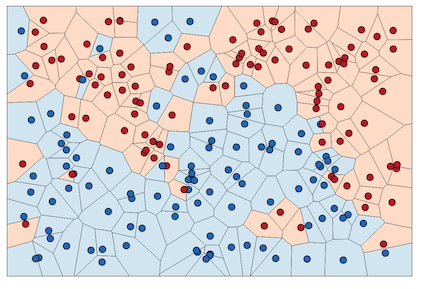

## Useful Tools
[Feature Tools](https://www.featuretools.com/)
- Feature engineering

[Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)
- Automated report gathering

[LIME](https://github.com/marcotcr/lime)
- Local Interpretable Model Explainer

[Mlxtend](http://rasbt.github.io/mlxtend/)
- Useful extensions for machine learning

## Prelims

- In practice, it's usually recommended to normalize your input data. 
- Few algorithmsare are scale-invariant specifically tree-based algorithms (decision trees, random forests, etc.). 


Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means 
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you'd emphasize variables on "larger measurement scales" more.

## What is KNN?
- Uses a sample’s geographic neighborhood to predict the sample’s classification.
- **Recommend centering and scaling all predictors prior to performing KNN.**

- Class probability estimates for the new sample are calculated as the proportion of training set neighbors in each class. 

- The new sample’s predicted class is the class with the highest probability estimate; if two or more classes are tied for the highest estimate, then the tie is broken at random or by looking ahead to the K + 1 closest neighbor.

## Mathematical Formulation
$$P(Y = j | X = x_0) = \frac{1}{K} \sum_{i \in \mathcal{N_0}} I(y_{i} = j)$$

- Algorithm runs through the entire dataset computing Distance between x and each training observation.

- We’ll call the K points in the training data that are closest to x the set ${N_0}$. Note that K is usually odd to prevent tie situations.

- We then estimates the conditional probability for each class, that is, the fraction of points in ${N_0}$ with that given class label. (Note I(x) is the indicator function which evaluates to 1 when the argument x is true and 0 otherwise)

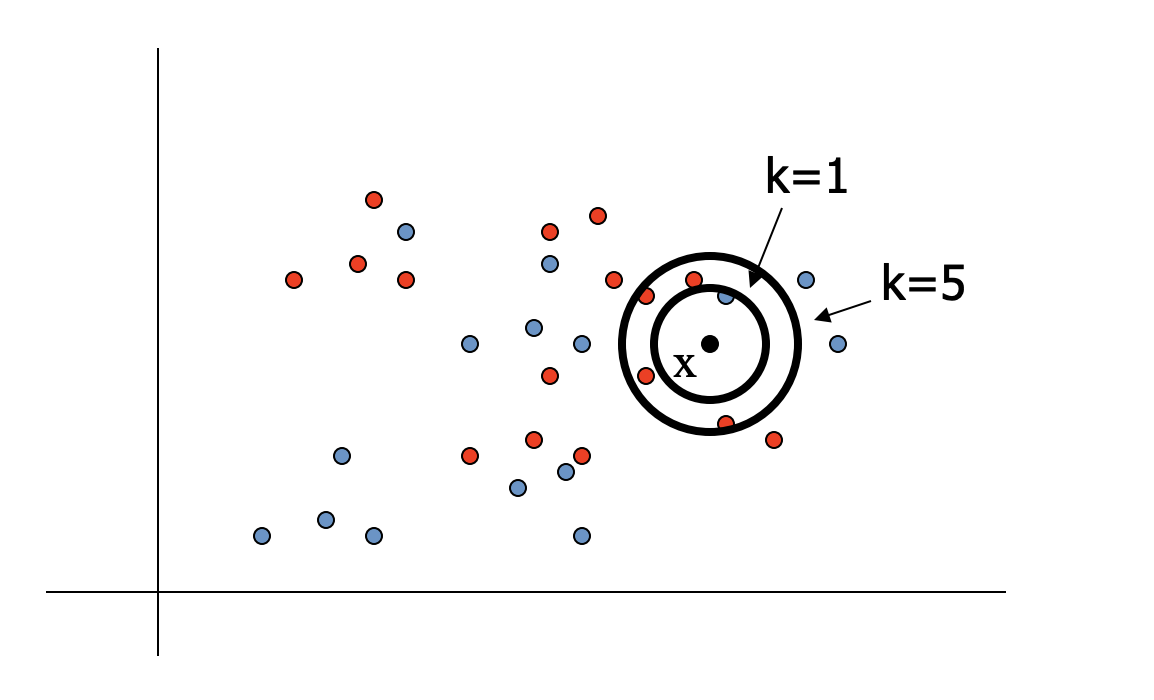

###  How to Choose K

Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try **Elbow method**.

- A small value for K provides the most flexible fit, which will have low bias but high variance

- A higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries which means lower variance but increased bias.

## Curse of Dimensionality
- KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases then it requires more data. 


- "Neighborhood” becomes very large. This problem of higher dimension is known as the Curse of Dimensionality.

**"As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially."**
 - [Charles Isbell](https://www.cc.gatech.edu/fac/Charles.Isbell/), Professor and Senior Associate Dean, School of Interactive Computing, Georgia Tech

## Example IRIS DATA SET

In [1]:
# conda install -c conda-forge pandas-profiling
import pandas_profiling as pp

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# define column names
names = ['sepal_length','sepal_width','petal_length', 'petal_width','class',]

# load training data
df = pd.read_csv('iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Pandas Profile Report
pp.ProfileReport(df)

Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,5.9 KiB
Average record size in memory,40.5 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


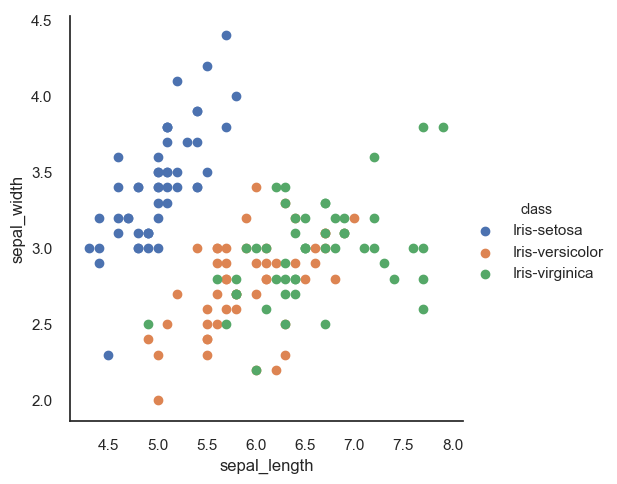

In [6]:
import seaborn as sns
import warnings
sns.set(style="white", color_codes=True)
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show() 

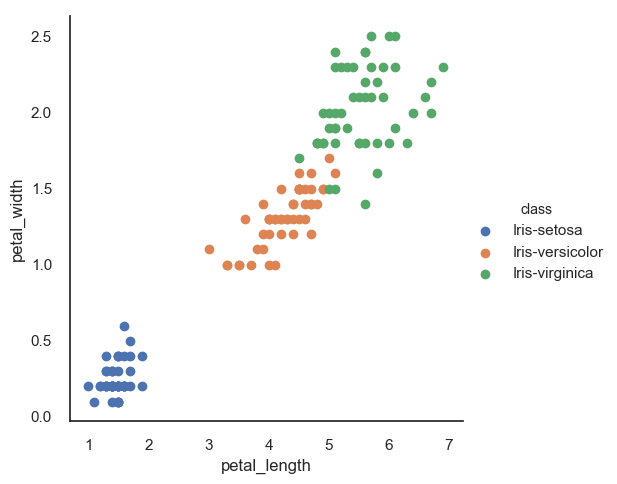

In [7]:
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()
plt.show() 

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:, 0:4]) 
y = np.array(df['class'])  

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.98


In [13]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
neighbors = list(range(1, 50, 1))

# empty list that will hold cv scores
cv_scores = []

# perform cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


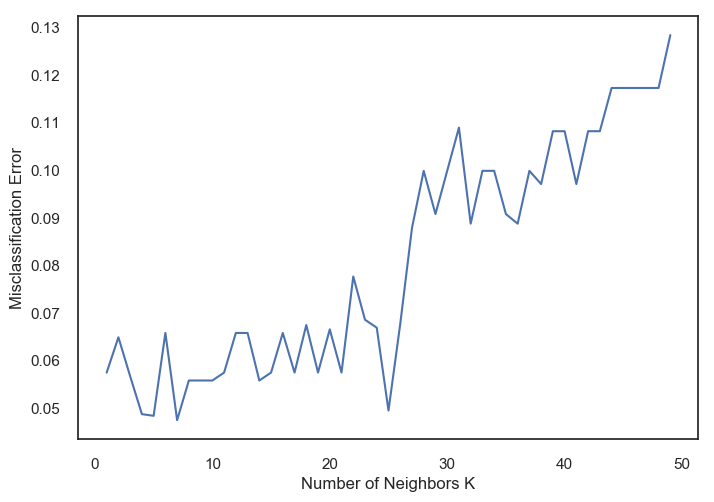

In [14]:
# changing to misclassification error
error = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[error.index(min(error))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, error)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

## Back To Breast Cancer

In [16]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
bc.head()
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)
predictor=bc.drop(columns=['class'])

In [17]:
#Pandas Profile Report
pp.ProfileReport(predictor)


Number of variables,9
Number of observations,569
Total Missing (%),0.0%
Total size in memory,40.1 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [21]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.9415204678362573


In [22]:
yprob = knn.predict_proba(X_test)
yprob
yprob[:5]

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ]])

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[97,  4],
       [ 6, 64]])

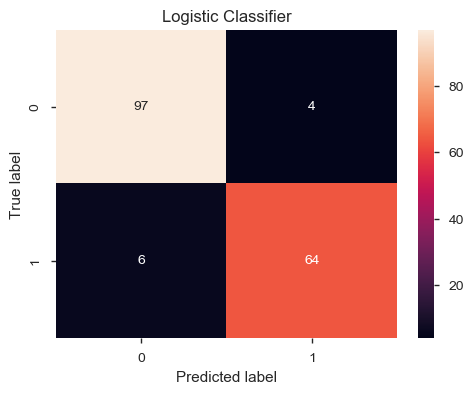

In [24]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred) 

0.9411764705882353

In [26]:
recall_score(y_test, y_pred) 

0.9142857142857143

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9275362318840579

## ROC CURVE

In [28]:
from sklearn.metrics import roc_curve
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

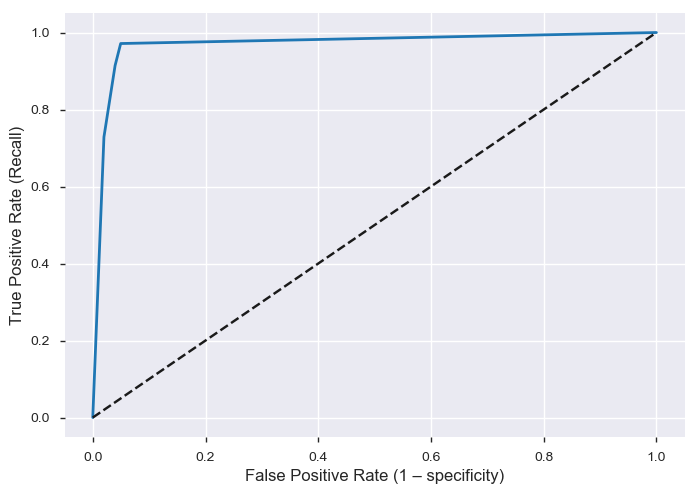

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate (1 – specificity)', fontsize=12) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)      
plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores[:, 1])

0.9697312588401698

## Heads Up!
- Any method with tuning parameters can be prone to over-fitting, and KNN is especially susceptible to this problem. 
- Too few neighbors leads to highly localized fitting (i.e., over-fitting).

- Too many neighbors leads to boundaries that may not locate necessary separating structure in the data. 

- **usual cross-validation or resampling approach to determine the optimal value of K**